In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/cleaned/EDA_flight_data.csv')

C:\Users\Playtime\AppData\Local\Temp\ipykernel_11160\3391854435.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/cleaned/EDA_flight_data.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997501 entries, 0 to 997500
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   from_airport_code                997501 non-null  object 
 1   from_country                     997501 non-null  object 
 2   dest_airport_code                997501 non-null  object 
 3   dest_country                     997501 non-null  object 
 4   airline_number                   997501 non-null  object 
 5   airline_name                     997501 non-null  object 
 6   departure_time                   997501 non-null  object 
 7   arrival_time                     997501 non-null  object 
 8   duration                         997501 non-null  int64  
 9   stops                            997501 non-null  int64  
 10  price                            997501 non-null  float64
 11  currency                         997501 non-null  object 
 12  co

In [4]:
data['departure_time'] = pd.to_datetime(data['departure_time'])
data['arrival_time'] = pd.to_datetime(data['arrival_time'])

In [9]:
def num_cat_split(df):
    num_df = pd.DataFrame(df.select_dtypes(include='number'))
    cat_df = pd.DataFrame(df.select_dtypes(include='object'))
    return num_df, cat_df

num_df, cat_df = num_cat_split(data)

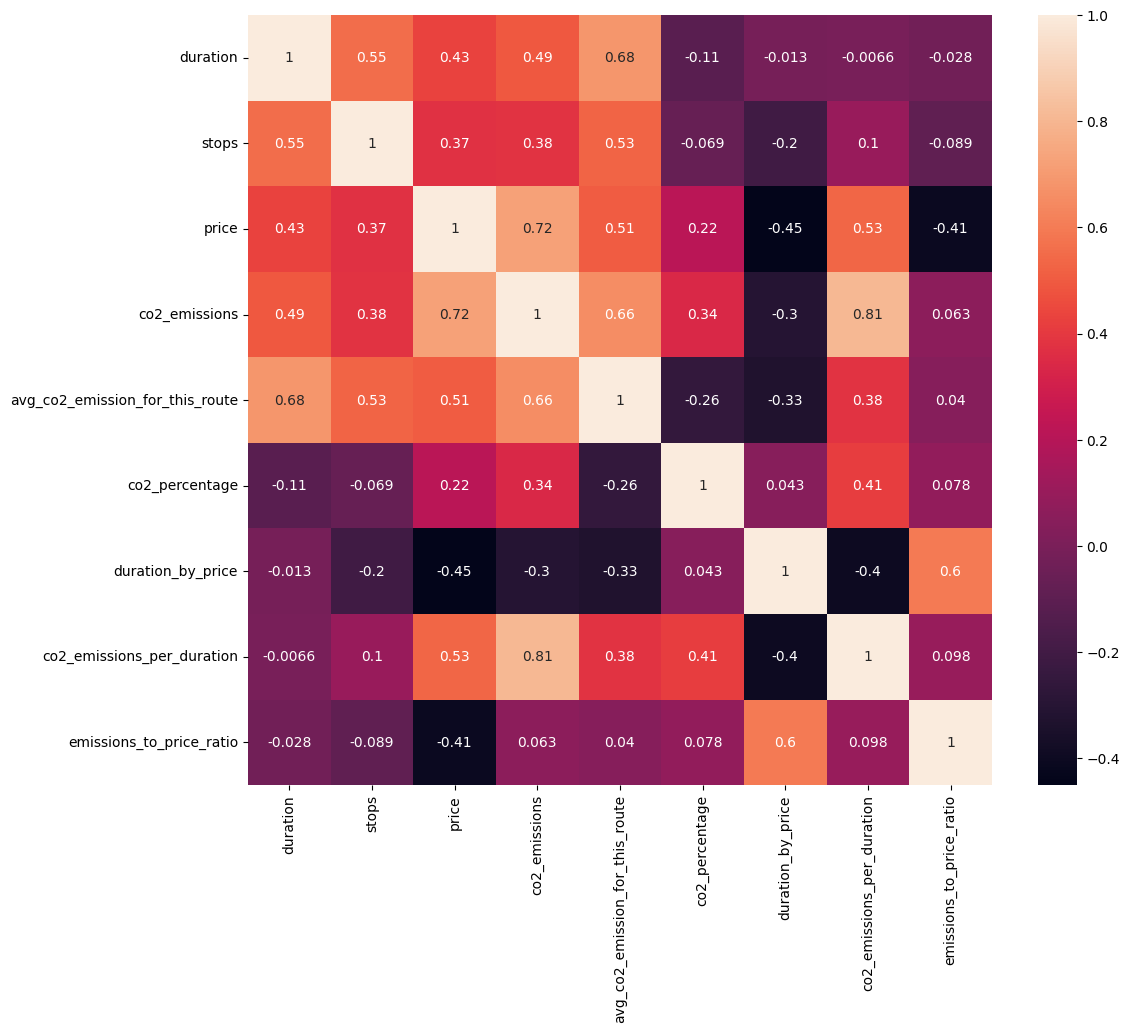

In [7]:
corr_matrix = num_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
def cont_disc_split(dataframe, n=36):
    cont_df = pd.DataFrame()
    disc_df = pd.DataFrame()
    for col in dataframe.columns:
        if len(dataframe[col].unique()) > n:
            cont_df[col] = dataframe[col]
        else:
            disc_df[col] = dataframe[col]
    return cont_df, disc_df

In [9]:
continuous_df, discrete_df = cont_disc_split(num_df)

In [10]:
continuous_df

,duration,price,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio
0,1425,1279.0,1320000.0,1320000.0,0,1.114152,926.315789,1032.056294
1,1425,1279.0,1195000.0,1320000.0,-9,1.114152,838.596491,934.323690
2,1530,1284.0,1248000.0,1320000.0,-5,1.191589,815.686275,971.962617
3,1425,1290.0,1347000.0,1320000.0,2,1.104651,945.263158,1044.186047
4,1540,1347.0,1381000.0,1320000.0,4,1.143281,896.753247,1025.241277
...,...,...,...,...,...,...,...,...
997496,1335,1317.0,1567000.0,1133000.0,38,1.013667,1173.782772,1189.825361
997497,1155,1317.0,1583000.0,1133000.0,39,0.876993,1370.562771,1201.974184
997498,1490,1328.0,1354000.0,1133000.0,19,1.121988,908.724832,1019.578313
997499,1695,1368.0,1099000.0,1133000.0,-2,1.239035,648.377581,803.362573


In [11]:
discrete_df

,stops
0,3
1,3
2,3
3,3
4,2
...,...
997496,1
997497,1
997498,2
997499,2


In [12]:
def barplot_discrete_df(dataframe):
    for col in dataframe.columns:
        plt.figure(figsize=(16, 6))
        sns.countplot(x=col, data=dataframe)
        plt.show()


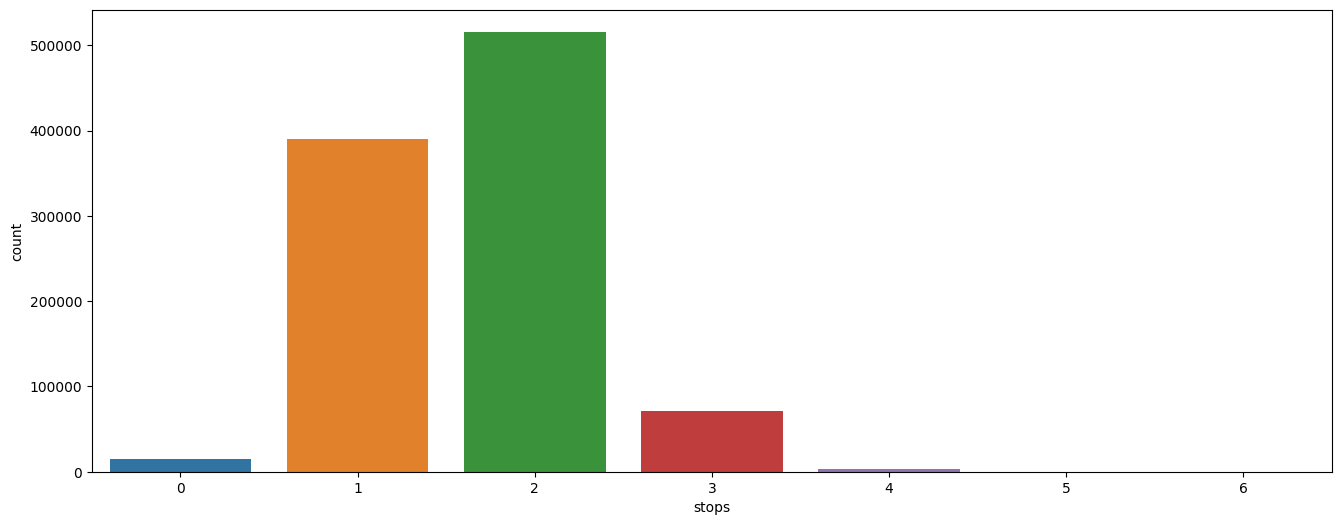

In [13]:
barplot_discrete_df(discrete_df)

In [14]:
def histplot_continuous_df(dataframe):
    for col in dataframe.columns:
        plt.figure(figsize=(16, 6))
        sns.histplot(x=col, data=dataframe)
        plt.show()


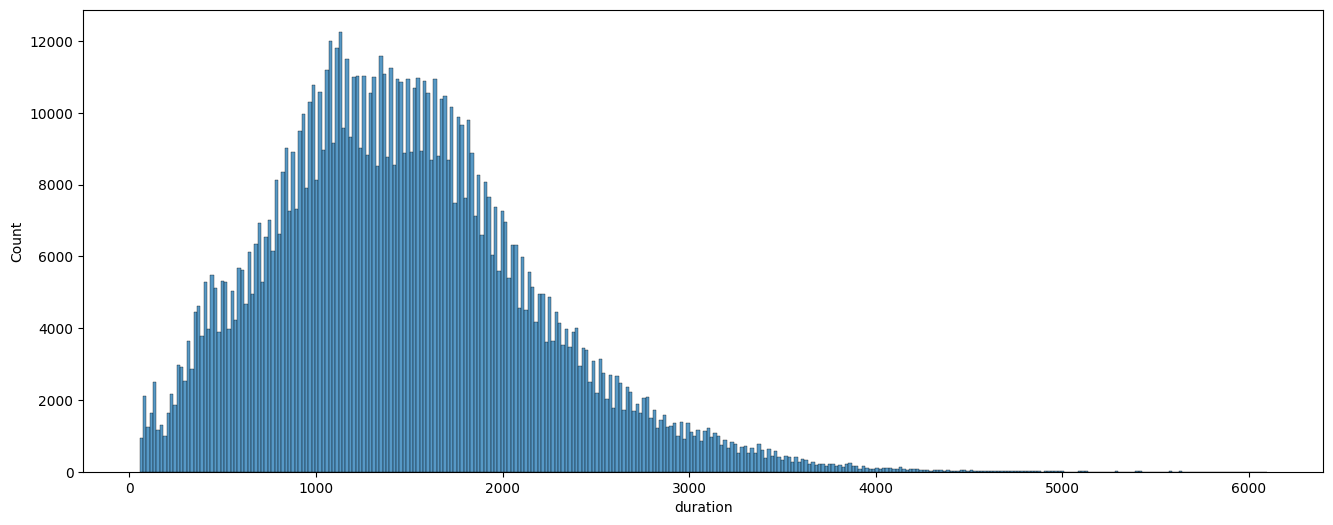

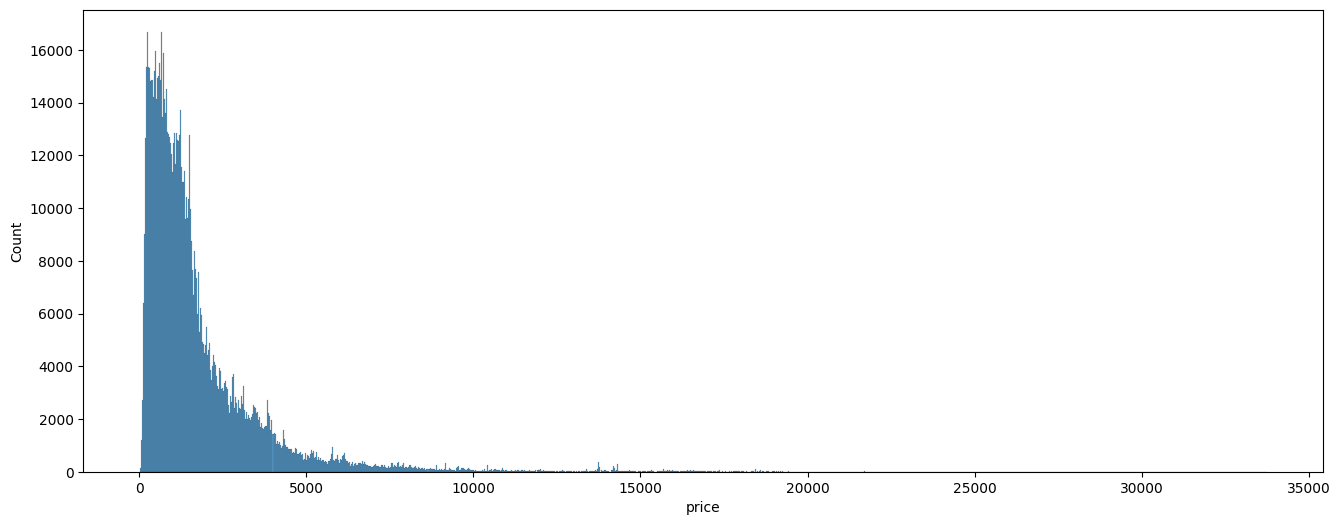

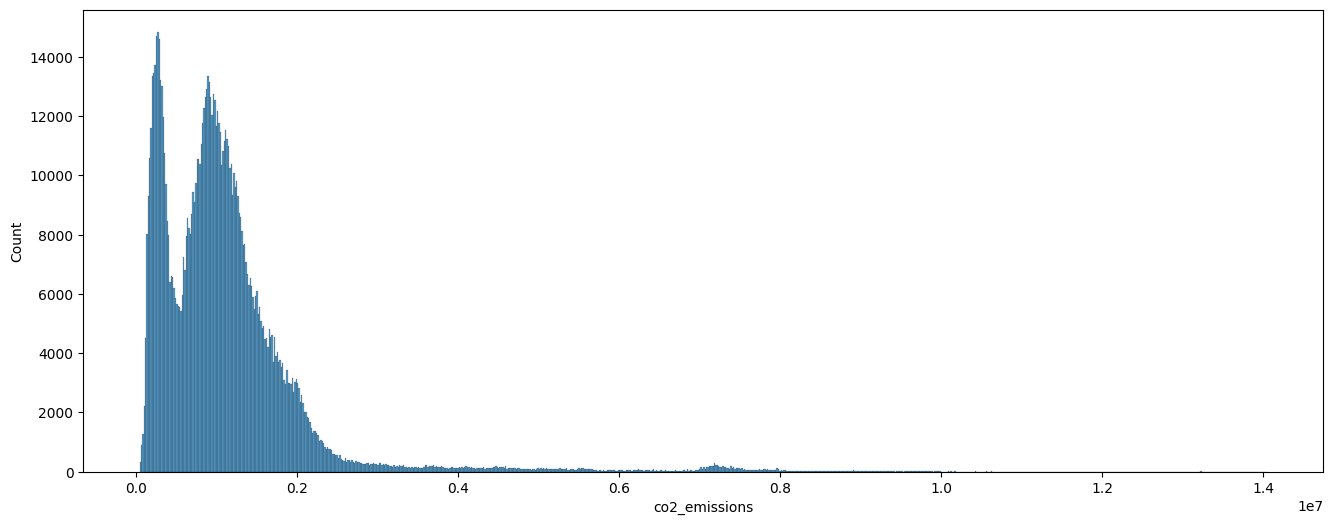

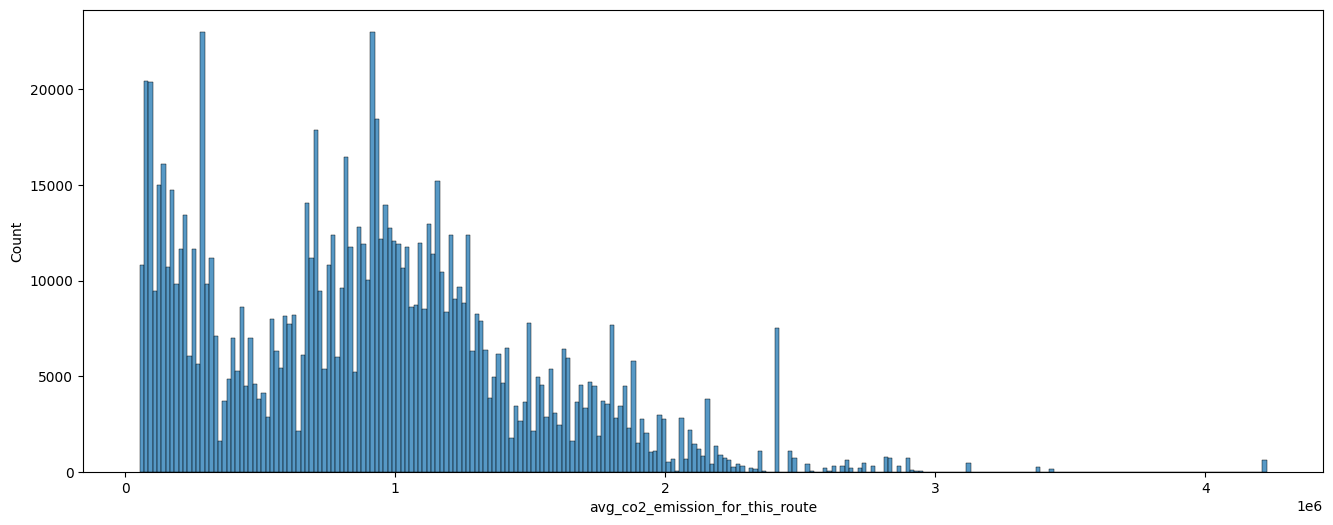

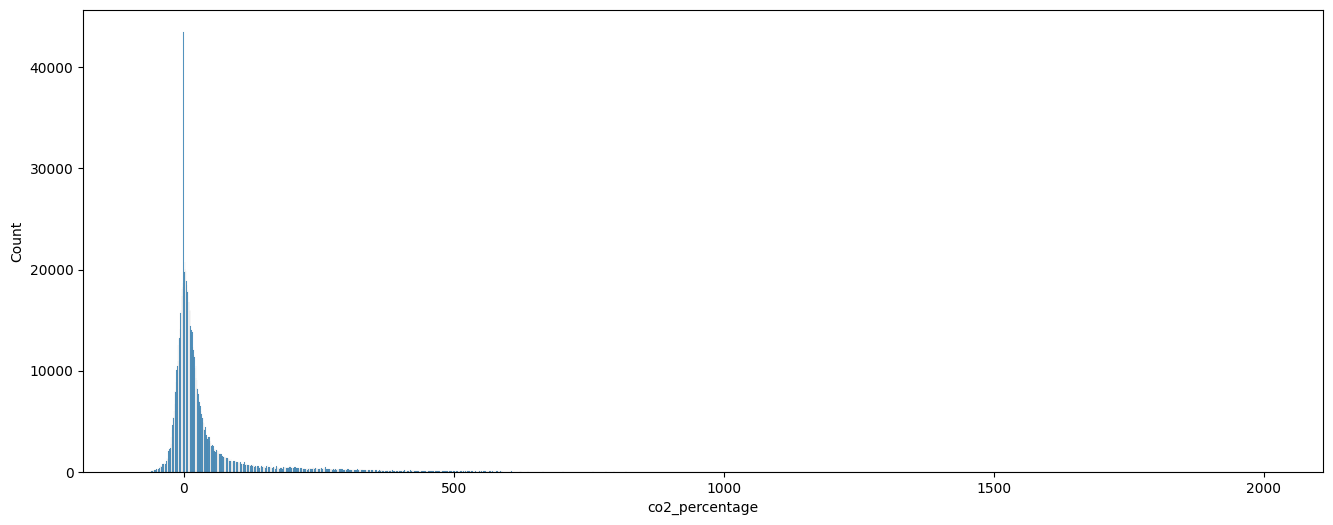

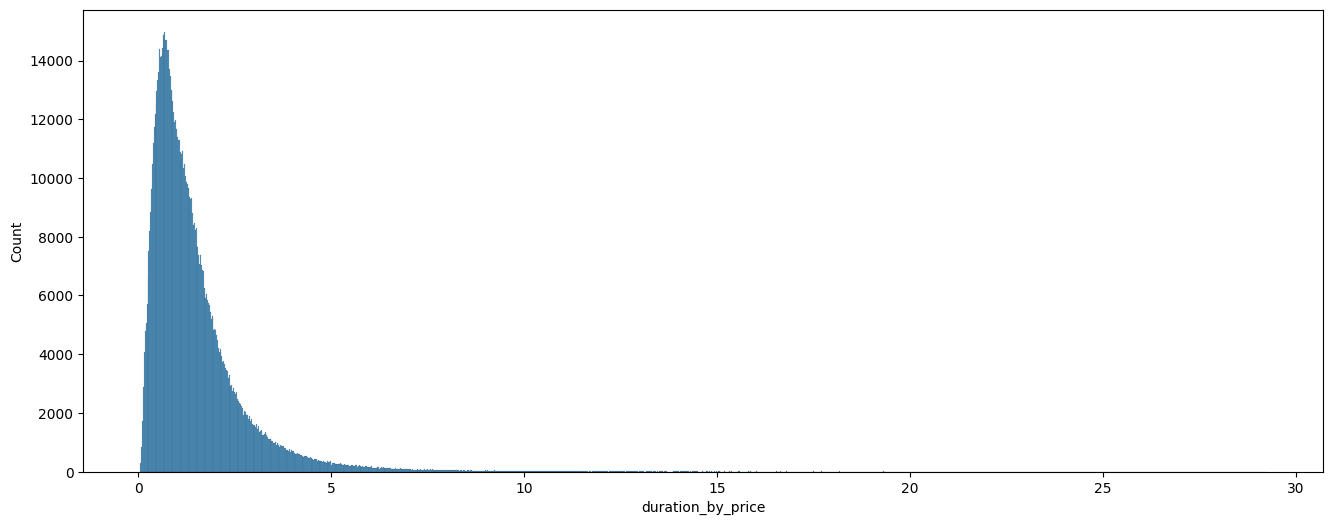

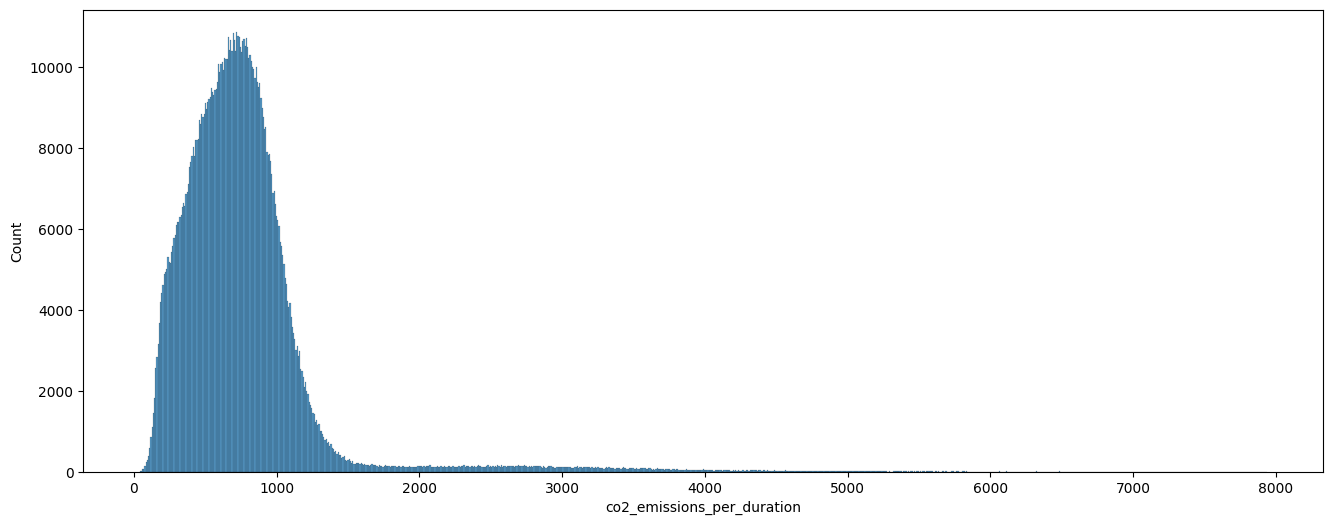

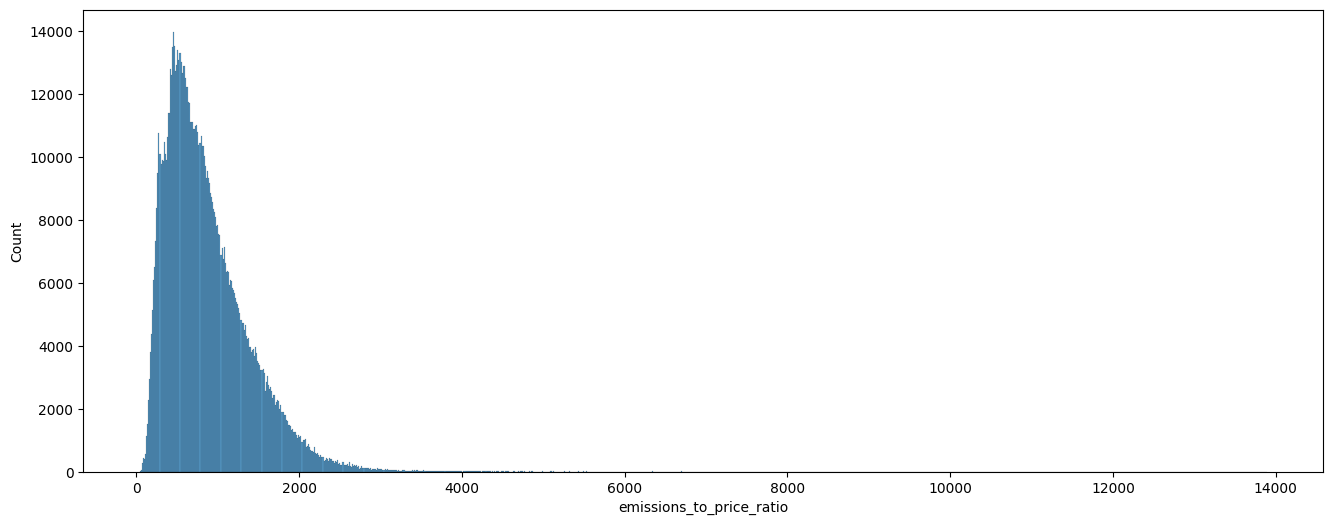

In [15]:
histplot_continuous_df(continuous_df)

In [16]:
def boxplot_continuous_df(dataframe):
    for col in dataframe.columns:
        plt.figure(figsize=(16, 6))
        sns.boxplot(x=col, data=dataframe)
        plt.show()

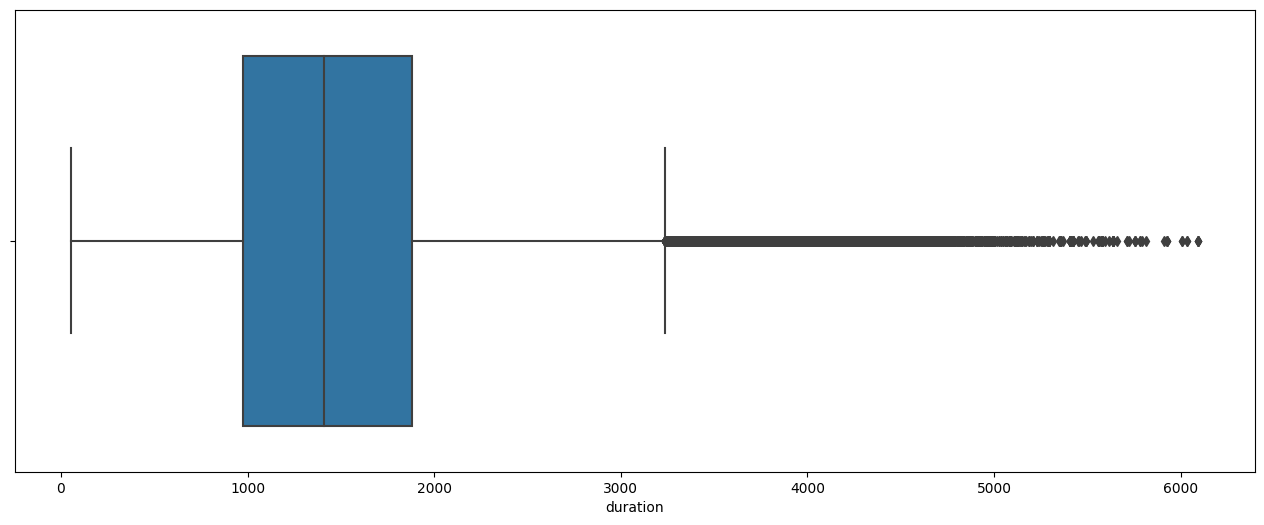

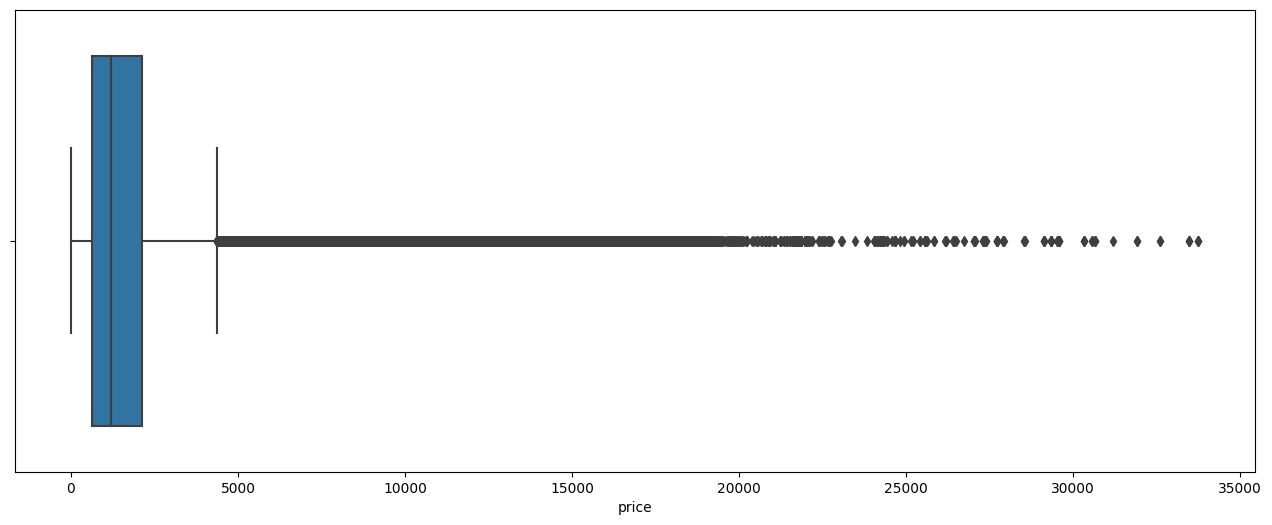

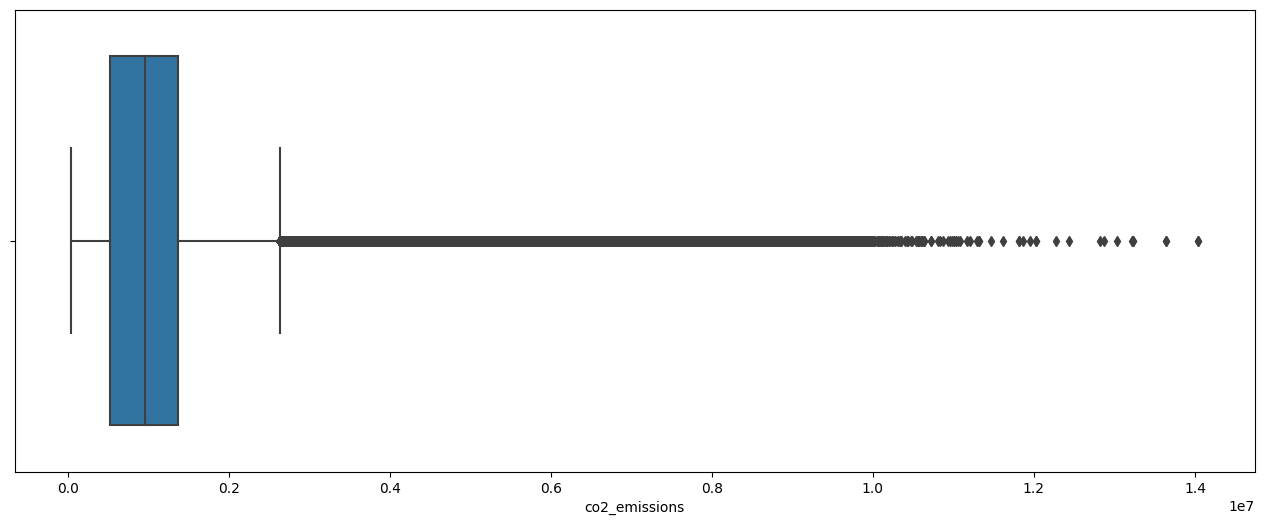

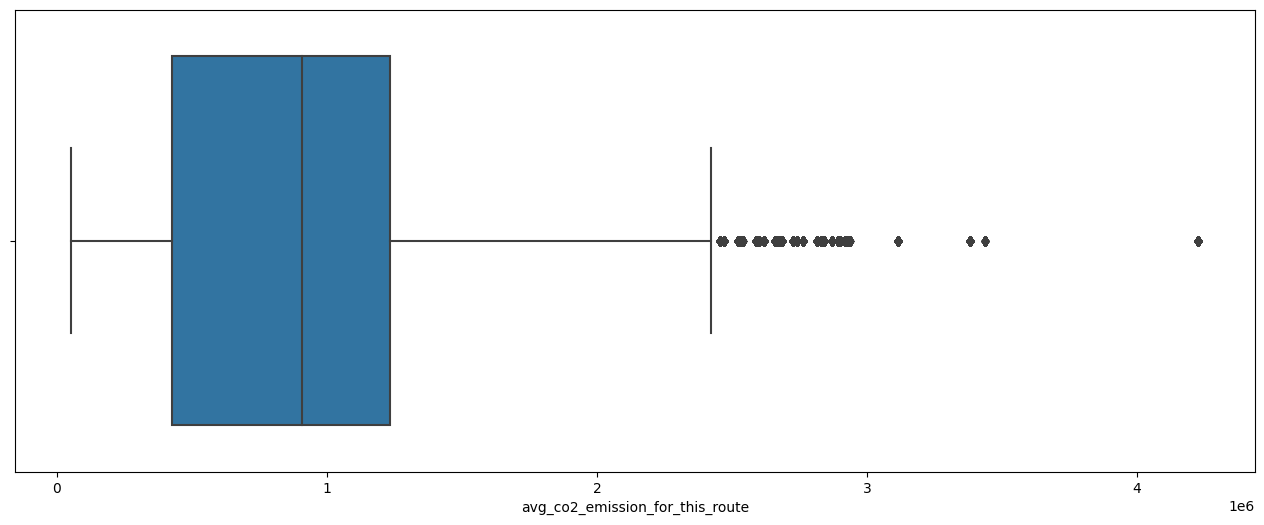

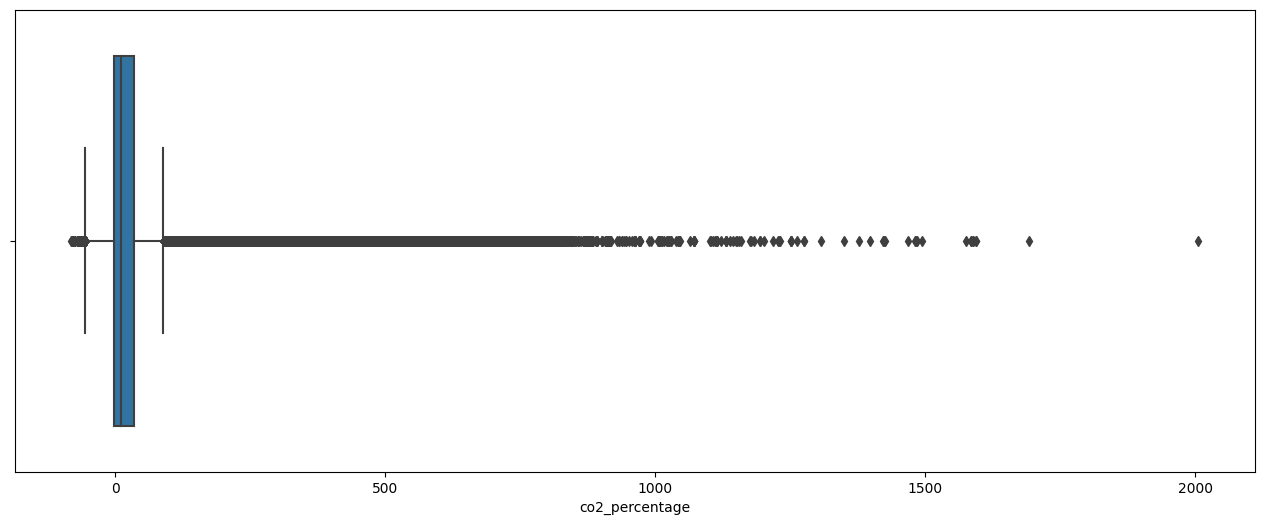

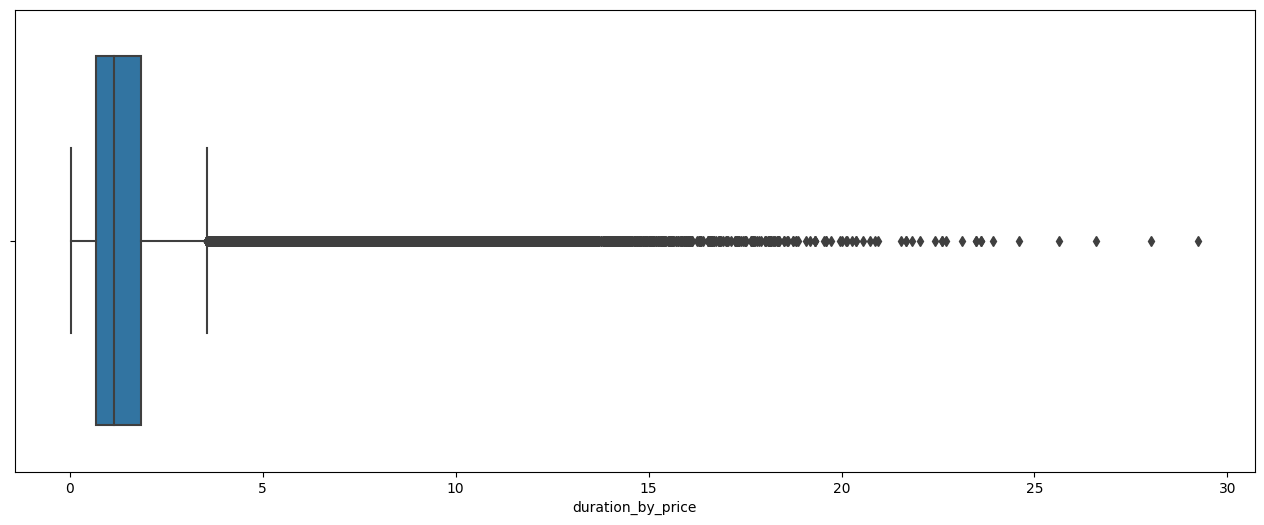

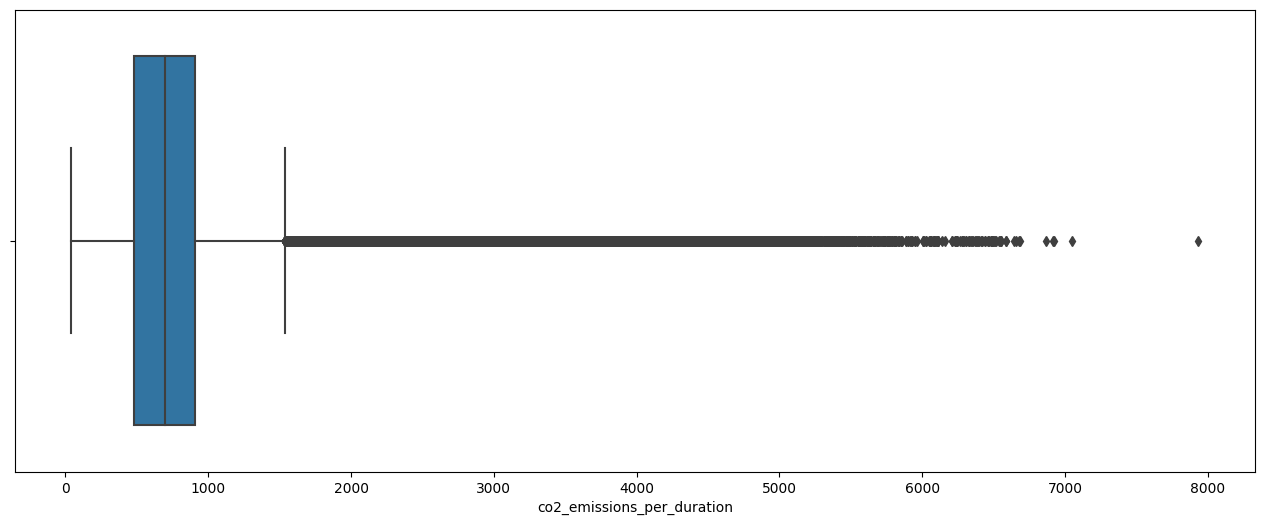

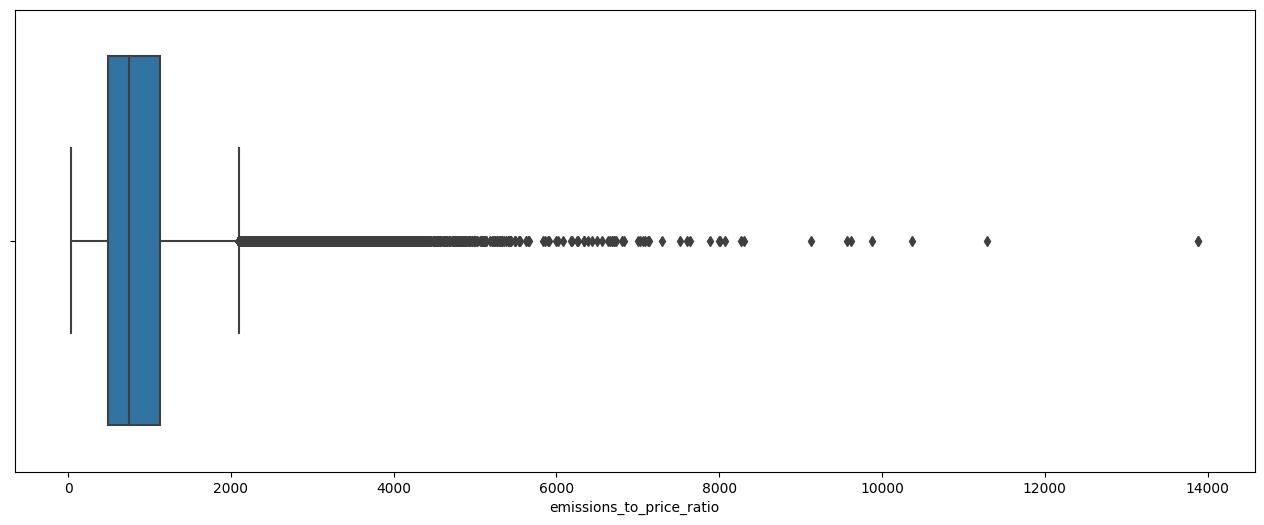

In [17]:
boxplot_continuous_df(continuous_df)

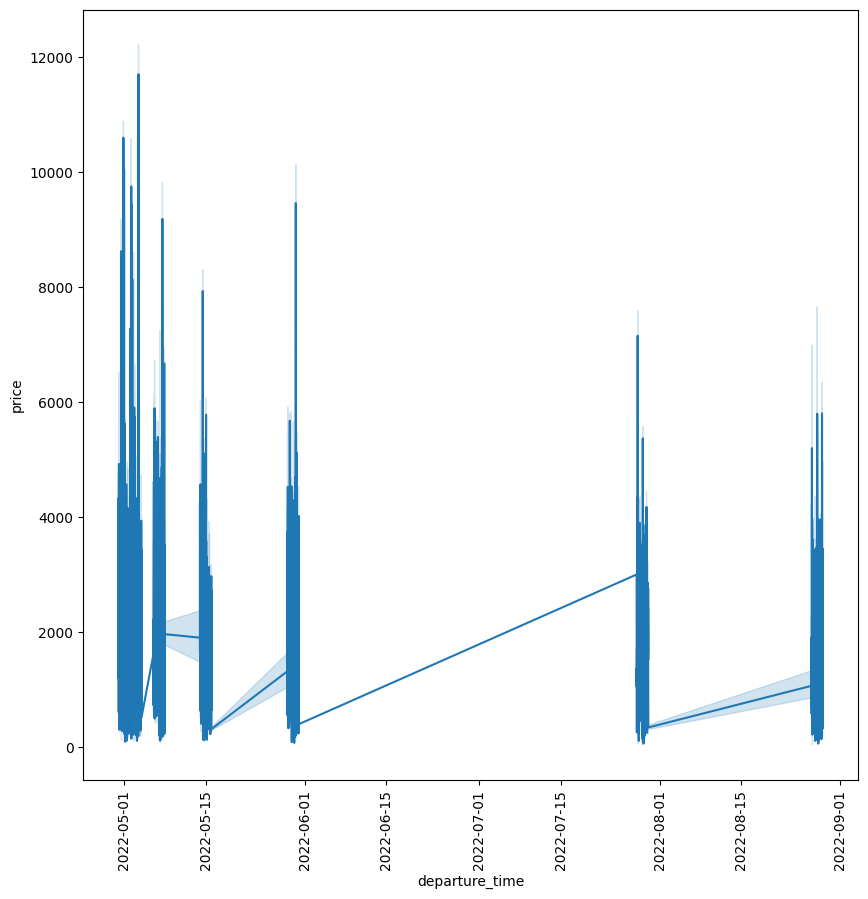

In [18]:
plt.figure(figsize=(10,10))
sx = sns.lineplot(x="departure_time", y="price", data=data)
plt.xticks(rotation=90)
#sx.set_xticklabels(sx.get_xticklabels(), rotation=90)
plt.show()

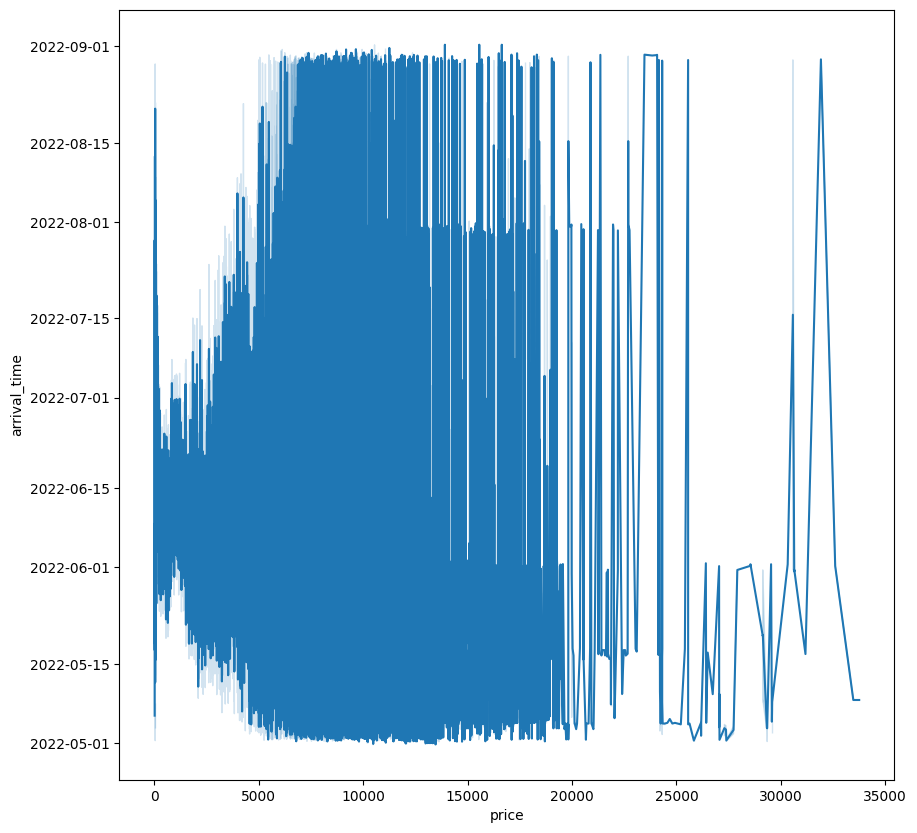

In [19]:
plt.figure(figsize=(10,10))
sns.lineplot(y="arrival_time", x="price", data=data)
plt.show()

In [20]:
data.columns

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'airline_number', 'airline_name', 'departure_time',
       'arrival_time', 'duration', 'stops', 'price', 'currency',
       'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage',
       'airline_name_1', 'airline_name_2', 'airline_name_3', 'airline_name_4',
       'airline_name_5', 'duration_by_price', 'co2_emissions_per_duration',
       'emissions_to_price_ratio', 'flight_route'],
      dtype='object')

In [21]:
#Create extra column month / Week day, Hour of day

In [22]:
#Time series?

In [23]:
#timedata = data.copy()

In [24]:
data

,from_airport_code,from_country,dest_airport_code,dest_country,airline_number,airline_name,departure_time,arrival_time,duration,stops,...,co2_percentage,airline_name_1,airline_name_2,airline_name_3,airline_name_4,airline_name_5,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio,flight_route
0,ALG,Algeria,AEP,Argentina,multi,Air France| Iberia| LATAM,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,...,0,Air France,Iberia,LATAM,0,0,1.114152,926.315789,1032.056294,Algeria to Argentina
1,ALG,Algeria,AEP,Argentina,multi,Air France| Iberia| LATAM,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,...,-9,Air France,Iberia,LATAM,0,0,1.114152,838.596491,934.323690,Algeria to Argentina
2,ALG,Algeria,AEP,Argentina,multi,Air France| LATAM,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,...,-5,Air France,LATAM,0,0,0,1.191589,815.686275,971.962617,Algeria to Argentina
3,ALG,Algeria,AEP,Argentina,multi,Air France| LATAM,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,...,2,Air France,LATAM,0,0,0,1.104651,945.263158,1044.186047,Algeria to Argentina
4,ALG,Algeria,AEP,Argentina,multi,Lufthansa| LATAM,2022-04-30 12:35:00,2022-05-01 10:15:00,1540,2,...,4,Lufthansa,LATAM,0,0,0,1.143281,896.753247,1025.241277,Algeria to Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997496,BOM,India,SYD,Australia,EK,Emirates,2022-05-01 19:20:00,2022-05-02 22:05:00,1335,1,...,38,Emirates,0,0,0,0,1.013667,1173.782772,1189.825361,India to Australia
997497,BOM,India,SYD,Australia,EK,Emirates,2022-05-01 22:20:00,2022-05-02 22:05:00,1155,1,...,39,Emirates,0,0,0,0,0.876993,1370.562771,1201.974184,India to Australia
997498,BOM,India,SYD,Australia,multi,Etihad| Virgin Australia,2022-05-01 04:35:00,2022-05-02 09:55:00,1490,2,...,19,Etihad,Virgin Australia,0,0,0,1.121988,908.724832,1019.578313,India to Australia
997499,BOM,India,SYD,Australia,multi,Air India| SriLankan,2022-05-01 06:10:00,2022-05-02 14:55:00,1695,2,...,-2,Air India,SriLankan,0,0,0,1.239035,648.377581,803.362573,India to Australia


In [96]:
cat_df

,from_airport_code,from_country,dest_airport_code,dest_country,airline_name_1,airline_name_2,airline_name_3,airline_name_4,airline_name_5
0,ALG,Algeria,AEP,Argentina,Air France,Iberia,LATAM,-,-
1,ALG,Algeria,AEP,Argentina,Air France,Iberia,LATAM,-,-
2,ALG,Algeria,AEP,Argentina,Air France,LATAM,-,-,-
3,ALG,Algeria,AEP,Argentina,Air France,LATAM,-,-,-
4,ALG,Algeria,AEP,Argentina,Lufthansa,LATAM,-,-,-
...,...,...,...,...,...,...,...,...,...
997496,BOM,India,SYD,Australia,Emirates,-,-,-,-
997497,BOM,India,SYD,Australia,Emirates,-,-,-,-
997498,BOM,India,SYD,Australia,Etihad,Virgin Australia,-,-,-
997499,BOM,India,SYD,Australia,Air India,SriLankan,-,-,-


In [5]:
data = data.drop(['currency', 'flight_route', 'airline_name'], axis=1)

In [6]:
data = data.drop(['airline_number'], axis=1)

In [7]:
for i in range(5):
    colname = "airline_name_" + str(i+1)
    data[colname] = data[colname].replace({'0': '-', 0: '-'})

In [8]:
num_df, cat_df = num_cat_split(data)

NameError: name 'num_cat_split' is not defined

In [10]:
X = data.drop(['price'],axis=1)
y = data['price']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#, random_state=1337)

In [12]:
X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(include='object')

In [35]:
#for i in range(5):
#    colname = "airline_name_" + str(i+1)
#    X_train_cat[colname] = X_train_cat[colname].replace({'0': '-', 0: '-'})


In [36]:
#for i in range(5):
#    colname = "airline_name_" + str(i+1)
#    X_test_cat[colname] = X_test_cat[colname].replace({'0': '-', 0: '-'})

In [68]:
#data_final = data.copy()

In [70]:
#data_final.to_csv("data_final.csv", index=False)

In [89]:
X_train_cat

,from_airport_code,from_country,dest_airport_code,dest_country,airline_name_1,airline_name_2,airline_name_3,airline_name_4,airline_name_5
707671,ADD,Ethiopia,NBO,Kenya,Ethiopian,-,-,-,-
260902,GRU,Brazil,JFK,United States,LATAM,-,-,-,-
479540,PVG,China,SZX,China,Shenzhen,-,-,-,-
551918,BOG,Columbia,CLT,United States,American,-,-,-,-
50067,SYD,Australia,DEL,India,Singapore Airlines,-,-,-,-
...,...,...,...,...,...,...,...,...,...
508418,HGH,China,OSL,Norway,KLM,-,-,-,-
97940,MEL,Australia,DEL,India,Qantas,THAI,-,-,-
140173,VIE,Austria,BOM,India,Austrian,Air India,-,-,-
293228,VCP,Brazil,FRA,Germany,Azul,Tap Air Portugal,-,-,-


In [ ]:
#pd.concat([X_train_new_scaled_df, X_train_cat_encoded_df], axis=1)

In [13]:
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cat)

# fit and transform the training set
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded,
                                      columns=encoder.get_feature_names_out(X_train_cat.columns))

# transform the test set
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,
                                     columns=encoder.get_feature_names_out(X_test_cat.columns))

In [91]:
X_train_cat_encoded_df

,from_airport_code_AEP,from_airport_code_ALG,from_airport_code_ATH,from_airport_code_BOG,from_airport_code_BOM,from_airport_code_BRU,from_airport_code_CAI,from_airport_code_CAN,from_airport_code_CDG,from_airport_code_CGO,...,airline_name_3_Vistara,airline_name_3_WestJet,airline_name_3_other,airline_name_4_Air India,airline_name_4_Air Serbia,airline_name_4_British Airways,airline_name_4_LATAM,airline_name_4_Turkish Airlines,airline_name_4_other,airline_name_5_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import PowerTransformer

# instantiate the power transformer
pt = PowerTransformer()

# fit and transform the numerical data in X_train and X_test
X_train_num_transformed = pt.fit_transform(X_train_num)
X_test_num_transformed = pt.transform(X_test_num)

# convert the resulting numpy arrays to pandas dataframes
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

In [97]:
X_train_num_transformed_df

,duration,stops,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio
707671,-2.548943,-2.858287,-1.949863,-0.238172,-7.762782,-1.432754,1.245236,-0.666460
260902,0.563291,-1.008465,0.110738,0.023480,0.025217,-0.090225,-0.426287,-0.492700
479540,-2.405191,-2.858287,-1.924459,-1.495498,-0.258495,-1.351299,0.767643,-0.945069
551918,-0.615861,-1.008465,-0.766428,-0.687430,-0.200633,0.455745,-0.605199,-0.056157
50067,-0.007874,-1.008465,0.070166,0.616319,-1.892073,0.241690,0.004326,0.268632
...,...,...,...,...,...,...,...,...
508418,0.708045,0.554853,0.232682,0.847158,-1.982357,-0.402104,-0.369070,-0.777548
97940,0.726662,0.554853,0.415019,0.426406,-0.040098,1.248576,-0.133494,1.408320
140173,-0.144944,0.554853,0.047303,-0.172874,0.195810,0.473687,0.102209,0.635787
293228,0.414722,0.554853,0.087087,0.211075,-0.258495,0.833698,-0.340241,0.643863


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num_transformed_df)
X_train_new_scaled = scaler.transform(X_train_num_transformed_df)
X_test_new_scaled = scaler.transform(X_test_num_transformed_df)

X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled, columns=X_train_num_transformed_df.columns)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled, columns=X_test_num_transformed_df.columns)

In [39]:
X_train_new_scaled_df

,duration,stops,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio
0,0.575263,0.553294,0.381625,0.748825,-0.835151,-1.053287,-0.060985,-1.243086
1,-0.204587,0.553294,0.292363,0.219112,0.040078,0.385753,0.507690,0.925315
2,0.434910,0.553294,-0.945695,-0.758204,-0.506784,0.432003,-1.850895,-1.187153
3,-1.049750,-1.009992,-1.845278,-1.823549,1.026093,1.635215,-1.810276,0.254662
4,0.172934,0.553294,0.161986,0.508608,-0.981074,-1.098416,-0.029227,-1.270345
...,...,...,...,...,...,...,...,...
797995,1.311356,1.954480,1.450977,3.711493,-3.766559,-0.910677,0.804277,-0.351534
797996,0.117797,-1.009992,0.916961,1.354282,-0.394397,0.123680,1.052957,1.139464
797997,0.062042,0.553294,0.612370,0.450514,0.195078,0.367431,0.693259,1.086595
797998,-0.749784,0.553294,-0.200038,-0.620834,0.500598,-0.680227,0.398794,-0.427291


In [16]:
X_train_final = pd.concat([X_train_new_scaled_df, X_train_cat_encoded_df], axis=1)
X_test_final  = pd.concat([X_test_new_scaled_df, X_test_cat_encoded_df], axis=1)

In [41]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798000 entries, 0 to 797999
Columns: 484 entries, duration to airline_name_5_other
dtypes: float64(484)
memory usage: 2.9 GB


In [100]:
X_train_final

,duration,stops,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio,from_airport_code_AEP,from_airport_code_ALG,...,airline_name_3_Vistara,airline_name_3_WestJet,airline_name_3_other,airline_name_4_Air India,airline_name_4_Air Serbia,airline_name_4_British Airways,airline_name_4_LATAM,airline_name_4_Turkish Airlines,airline_name_4_other,airline_name_5_other
0,-2.548943,-2.858287,-1.949863,-0.238172,-7.762782,-1.432754,1.245236,-0.666460,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.563291,-1.008465,0.110738,0.023480,0.025217,-0.090225,-0.426287,-0.492700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.405191,-2.858287,-1.924459,-1.495498,-0.258495,-1.351299,0.767643,-0.945069,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.615861,-1.008465,-0.766428,-0.687430,-0.200633,0.455745,-0.605199,-0.056157,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.007874,-1.008465,0.070166,0.616319,-1.892073,0.241690,0.004326,0.268632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797995,0.708045,0.554853,0.232682,0.847158,-1.982357,-0.402104,-0.369070,-0.777548,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797996,0.726662,0.554853,0.415019,0.426406,-0.040098,1.248576,-0.133494,1.408320,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797997,-0.144944,0.554853,0.047303,-0.172874,0.195810,0.473687,0.102209,0.635787,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797998,0.414722,0.554853,0.087087,0.211075,-0.258495,0.833698,-0.340241,0.643863,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#X_train_final.to_csv('X_train_final.csv')
#X_test_final.to_csv('X_test_final.csv')

In [70]:
#X_test_final = pd.read_csv('X_test_final.csv')

In [71]:
#X_train_final = pd.read_csv('X_train_final.csv')

In [73]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train_final, y_train)

# Get predictions for the training and test data
y_train_pred = lr.predict(X_train_final)
y_test_pred = lr.predict(X_test_final)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    df_metrics = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })

    return df_metrics

In [78]:
df_metrics_train = get_error_metrics(y_train, y_train_pred)
df_metrics_test = get_error_metrics(y_test, y_test_pred)

In [79]:
train_metrics = get_error_metrics(y_train, y_train_pred)
print('Train Metrics:')
print(train_metrics)

# Calculate the metrics for the test set
test_metrics = get_error_metrics(y_test, y_test_pred)
print('Test Metrics:')
print(test_metrics)

Train Metrics:
  Error_metric          Value
0          MAE     570.636196
1          MSE  822734.597303
2         RMSE     907.047186
3         MAPE      99.250746
4           R2       0.791112
Test Metrics:
  Error_metric          Value
0          MAE     570.849148
1          MSE  825326.484293
2         RMSE     908.474812
3         MAPE      98.764327
4           R2       0.791917


In [80]:
#The MAE value of 570.636196 (train) and 570.849148 (test) indicates that, on average, the predicted values deviate from the actual values by approximately 570 units.

In [ ]:
#The MSE value of 822734.597303 (train) and 825326.484293 (test) represents the average squared deviation between the predicted and actual values.

In [ ]:
#The RMSE value of 907.047186 (train) and 908.474812 (test) indicates the typical magnitude of the errors.

In [ ]:
#The MAPE value of 99.250746 (train) and 98.764327 (test) suggests that, on average, the predicted values deviate from the actual values by approximately 99% (train) and 98% (test) in percentage terms.

In [ ]:
#The R2 value of 0.791112 (train) and 0.791917 (test) suggests that approximately 79% of the variance in the target variable is explained by the model.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [84]:
#def train_models(model_list, X_train, y_train):
#    for model in model_list:
#        model.fit(X_train, y_train)
#    return model_list

In [86]:
def train_models(model_list, X_train, y_train):
    trained_models = []
    for model in model_list:
        if model == 'LinearRegressor':
            reg = LinearRegression()
        elif model == 'KNeighborsRegressor':
            reg = KNeighborsRegressor()
        elif model == 'MLPRegressor':
            reg = MLPRegressor()
        else:
            raise ValueError(f"Invalid model name: {model}")
        reg.fit(X_train, y_train)
        trained_models.append(reg)
    return trained_models

In [87]:
#model_list = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]
#fitted_models = train_models(model_list, X_train, y_train)

ValueError: Invalid model name: LinearRegression()

In [44]:
model_list = ['LinearRegressor', 'KNeighborsRegressor', 'MLPRegressor']

In [89]:
model_list = ['LinearRegressor', 'KNeighborsRegressor', 'MLPRegressor']
trained_models = train_models(model_list, X_train_final, y_train)

C:\Users\Playtime\Ironhack\Lessons\Week_9\Final_project\final_environment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
#X_train_cat_encoded_df.to_csv("X_train_cat_encoded.csv", index=False)

In [7]:
#X_train_cat_encoded_df = pd.read_csv('X_train_cat_encoded.csv')

In [ ]:
import pickle

# Save each trained model as a pickle file
for i, model in enumerate(trained_encoding):
    model_name = model_list[i]  # Get the model name
    file_name = f"{model_name}.pickle"  # Create the file name
    
    with open(file_name, 'wb') as f:
        pickle.dump(model, f)

print("Models saved as pickle files.")

In [90]:
trained_models

[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

In [94]:
import pickle

# Save each trained model as a pickle file
for i, model in enumerate(trained_models):
    model_name = model_list[i]  # Get the model name
    file_name = f"{model_name}.pickle"  # Create the file name
    
    with open(file_name, 'wb') as f:
        pickle.dump(model, f)

print("Models saved as pickle files.")

Models saved as pickle files.


In [47]:
# Load the trained models from pickle files
trained_models = []
for model_name in model_list:
    file_name = f"{model_name}.pickle"
    with open(file_name, 'rb') as f:
        model = pickle.load(f)
        trained_models.append(model)

In [48]:
# Perform prediction using the trained models
predicted_values = {}

for i, model in enumerate(trained_models):
    model_name = model_list[i]  # Get the model name
    
    y_train_pred = model.predict(X_train_final)  # Get predictions for the training data
    y_test_pred = model.predict(X_test_final)  # Get predictions for the test data
    
    # Store the predicted values in a dictionary with model name as the key
    predicted_values[model_name] = {
        'Train': y_train_pred,
        'Test': y_test_pred
    }

In [49]:
for model_name, predictions in predicted_values.items():
    for dataset, values in predictions.items():
        file_name = f"{model_name}_{dataset}.pickle"
        with open(file_name, 'wb') as f:
            pickle.dump(values, f)

print("Predicted values saved as pickle files.")

Predicted values saved as pickle files.


In [50]:
for model_name in model_list:
    for dataset in ['Train', 'Test']:
        file_name = f"{model_name}_{dataset}.pickle"
        with open(file_name, 'rb') as f:
            values = pickle.load(f)
            predicted_values.setdefault(model_name, {})[dataset] = values

In [53]:
error_metrics = []

for model_name, predictions in predicted_values.items():
    for dataset, values in predictions.items():
        y_true = y_train if dataset == 'Train' else y_test
        y_pred = values
        
        metrics = get_error_metrics(y_true, y_pred)
        metrics['Model'] = f"{model_name} ({dataset})"
        
        error_metrics.append(metrics)

In [54]:
all_metrics = pd.concat(error_metrics)

In [55]:
all_metrics

,Error_metric,Value,Model
0,MAE,570.446764,LinearRegressor (Train)
1,MSE,823888.922107,LinearRegressor (Train)
2,RMSE,907.683272,LinearRegressor (Train)
3,MAPE,99.278866,LinearRegressor (Train)
4,R2,0.791211,LinearRegressor (Train)
0,MAE,570.248905,LinearRegressor (Test)
1,MSE,820894.071480,LinearRegressor (Test)
2,RMSE,906.032048,LinearRegressor (Test)
3,MAPE,98.080604,LinearRegressor (Test)
4,R2,0.791479,LinearRegressor (Test)


In [56]:
# Save the error metrics as a CSV file
all_metrics.to_csv('error_metrics.csv', index=False)

print("Error metrics saved as error_metrics.csv.")

Error metrics saved as error_metrics.csv.


In [72]:
data.columns

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'departure_time', 'arrival_time', 'duration', 'stops',
       'price', 'co2_emissions', 'avg_co2_emission_for_this_route',
       'co2_percentage', 'airline_name_1', 'airline_name_2', 'airline_name_3',
       'airline_name_4', 'airline_name_5', 'duration_by_price',
       'co2_emissions_per_duration', 'emissions_to_price_ratio'],
      dtype='object')

In [93]:
X_tree_train_df = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_tree_test_df = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_final, y_train)

DecisionTreeRegressor()

In [19]:
print("Train data R2 was: {:.2f} ".format(regressor.score(X_train_final, y_train)))
print("Test data R2 was: {:.2f}".format(regressor.score(X_test_final, y_test)))

Train data R2 was: 1.00 
Test data R2 was: 1.00


In [20]:
y_pred = regressor.predict(X_test_final)

In [21]:
y_pred

array([1809.,  205.,  367., ...,  264.,  353., 1078.])

In [23]:
import pickle
with open('DecisionTreeRegressor.pickle', 'wb') as f:
    pickle.dump(regressor, f)

print("Model saved successfully.")

Model saved successfully.


In [25]:
error_metrics = get_error_metrics(y_test, y_pred)

In [26]:
error_metrics

,Error_metric,Value
0,MAE,5.537942
1,MSE,2463.839645
2,RMSE,49.637079
3,MAPE,0.260377
4,R2,0.999376


In [27]:
#Best model is MLPRegressor